<a href="https://colab.research.google.com/github/marysteffim/marysteffim/blob/main/Internship_GRIPMarch2023_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Decision Tree Algorithm-(Level - Intermediate)**


## **PROJECT SUMMARY**
Aim: Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

  ● Dataset : https://bit.ly/3kXTdox

  ● Task submission:

  Host the code on GitHub Repository (public). Record the code and output in a video. Post the video on YouTube
  Share links of code (GitHub) and video (YouTube) as a post on YOUR LinkedIn profile
  Submit the LinkedIn link in Task Submission Form when shared.
  Please read FAQs on how to submit the tasks.

## **REQUIREMENT**

**Dataset** : https://bit.ly/3kXTdox

**Programming Language**: Python

**IDE**: Google Collab

**Repository**: GitHUB REpository(Public)

## **ANALYSIS**


•	**Given** : Data is an Microsoft Excel Comma Separated Values File (.csv)

•	**AIM**: 	  The purpose is if we feed any new data to this classifier, it would be able :

o	To Build a Decision Tree model with following insights

o	The purpose is if we feed any new data to this classifier

o	A trained model which can predict the right class accordingly


•	**DATA EXPLORATION**:

o	150 samples given, 6 features Totally 

o	Species is the target Variable

o	There are **no** missing values or hidden missing values or corrupted values found

**Data preprocessing** :

o	**Manual replacing** for binary and 3 category values

o	**Frequency encoding** is preferred for features with more than 3 unique values, (as they are nominal values more than 3 values present and one hot coding increases the no of columns and thus increasing processing time and memory usage)

o	**SMOTE:**  Synthetic Minority Oversampling Technique to balance the Class imbalance of the given samples. As the imbalance in the sample classification can cause overfitting of prediction values

o	**Standardization/ Standard scaling**: A Feature scaling techniques to scale all the values of the sample to a specific scale before input them into the model. This technique improves the performance rate of the model by improving the model learning rate

•	**MODEL/ALgorithm SELECTION**:

o	Since our target variable has categorical values, **Decision Tree Model** is best fitted for the performance

o	It is **Supervised learning technique** that can be used for both classification and Regression problems, but mostly it is preferred for solving **Classification problems**

o	It is a tree-structured classifier, 

*   **Internal nodes** represent the **features** of a dataset
*   **Branches** represent the **decision rules**
*   **leaf node** represent the **outcome**



## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
url='/content/drive/MyDrive/Jupyter Anaconda Data Scientist/Project for internship/GRIP/Iris.csv'
df=pd.read_csv(url)  # read file

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()   # no null values found

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.shape   # Given 150 samples and 6 features but one of this feature has to be Target variable

(150, 6)


  

  

  



*   Given **150 samples and 6 features**, but one of this feature has to be Target variable
*   5 feature variables - **Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm**
*   Target Variable  - **Species**






## **DATA PROCESSING**

#### **Each feature exploration**


In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
dcA=df.columns

In [10]:
for dcAi in dcA:
    print(dcAi)
    print(df[dcAi].unique()) 
    print(df[dcAi].value_counts())

 # unique values and no.of unique values present

Id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 150, dtype: int64
SepalLengthCm
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4  



*   No Missing Values Found
*   Target Variable = "Species", is of **Categorical Values**
*   **Id feature can be removed**, since its of unique values and doesn't participate in the model ; it just increase compuational time, Reduces execution speed, and thus lowers Performance

*  There is **no Class Imbalance** ; So there is no need of Sampling Technique; if Class Imbalance is found Smote is one of the High performing Sampling Technique




## Encoding   

Categorical values to Numerical Values

#### **Manual replacement of string values**

In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
df["Species"]=df["Species"].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [13]:
print(df["Species"].unique()) 
print(df["Species"].value_counts())  

[1 2 3]
1    50
2    50
3    50
Name: Species, dtype: int64


Class Samples Perfectly Balanced

In [14]:
df = df.drop(['Id'], axis = 1)

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## **VISUALIZATION**

[[<AxesSubplot:title={'center':'SepalLengthCm'}>
  <AxesSubplot:title={'center':'SepalWidthCm'}>
  <AxesSubplot:title={'center':'PetalLengthCm'}>
  <AxesSubplot:title={'center':'PetalWidthCm'}>
  <AxesSubplot:title={'center':'Species'}> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubpl

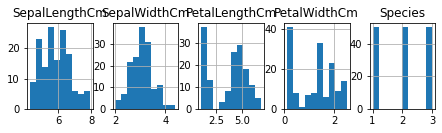

In [16]:
print(df.hist(layout=(10,10), figsize=(15,20)))

#### **Visualization of the target variable data distribution**

In [17]:
type(df["Species"])

pandas.core.series.Series

Species=df.Species

Iris_setosa =list(Species).count(1)
Iris_versicolor =list(Species).count(2)
Iris_virginica =list(Species).count(3)


Species=[Iris_setosa,Iris_versicolor, Iris_virginica]

In [18]:
Species=list(df.Species)

Iris_setosa =Species.count(1)
Iris_versicolor =Species.count(2)
Iris_virginica =Species.count(3)


Class=[Iris_setosa,Iris_versicolor, Iris_virginica]

([<matplotlib.patches.Wedge at 0x7f1bbf08a4f0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris_setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris_versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris_virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

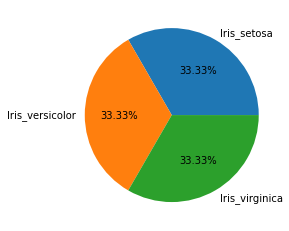

In [19]:
plt.pie(Class, labels=['Iris_setosa','Iris_versicolor', 'Iris_virginica'], autopct = '%.2f%%')

The Above Pie Chart also shows that the Sample is perfectly balanced

## **Correlation**

In [20]:
df.corr().Species



SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

<AxesSubplot:>

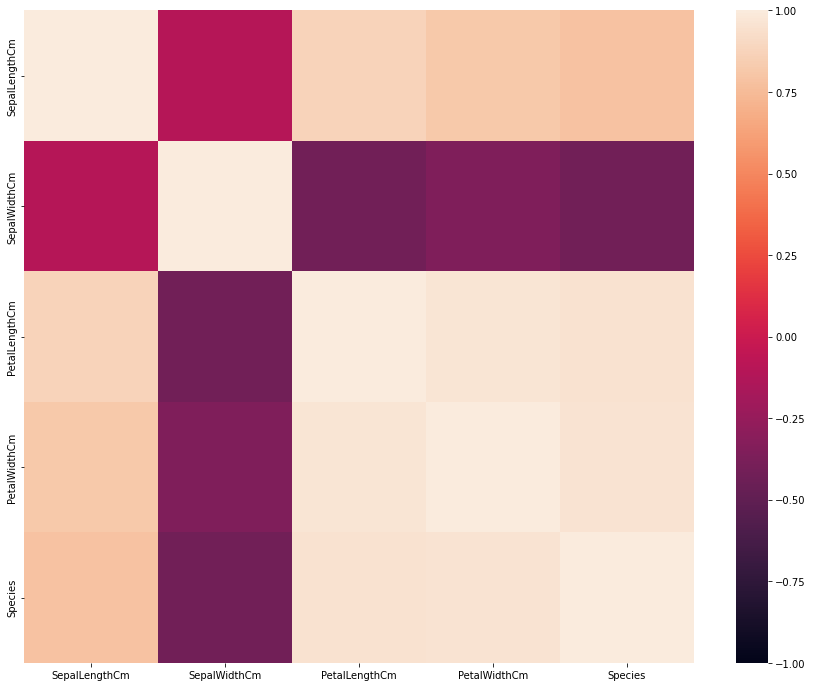

In [21]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,12)
sns.heatmap(df.corr(),vmin=-1,vmax=1) 

Since only 4 features are given, we Don't Require Feature Selection

## **PROCESSED DATA**

#### **Seperation of X and y variables**

In [22]:
X=df.iloc[:, 0:4]   # df.iloc[(row), (columns)]

In [23]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y=df.Species

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

## **Train test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


## **Standard Scaling**

from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()    
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test)  
#### This line of code corrupts the deployment code so removing it, there is no changes in the Performance




## **Decision Tree Model**

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Model = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
Model=DecisionTreeClassifier()

In [32]:
Model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
Cross_score=cross_val_score(Model, X_train, y_train)

In [34]:
Cross_score

array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.95833333])

In [35]:
print("Mean cross-validation score: %.2f" % Cross_score.mean())

Mean cross-validation score: 0.94


#### **Predict_model**

In [36]:
Predict_model = Model.predict(X_test)
Matrix = confusion_matrix(y_test,Predict_model) 
print(Matrix)  # the False negative and False positive are zeros, showing, the predictions are accurate with no False reading.
# therefore the Performance of the Model is High and Accurate  


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [37]:
print(classification_report(y_test,Predict_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### **Accuracy Score for Decision Tree model**

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Predict_model)


1.0

In [39]:
Predict_model = Model.predict(X_test[0:10]) # Predicted Results
Predict_model

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2])

In [40]:
test_Samples_out=y_test[0:10]   # expected output
test_Samples_out

73     2
18     1
118    3
78     2
76     2
31     1
64     2
141    3
68     2
82     2
Name: Species, dtype: int64

In [48]:
X_test, y_test

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 73             6.1           2.8            4.7           1.2
 18             5.7           3.8            1.7           0.3
 118            7.7           2.6            6.9           2.3
 78             6.0           2.9            4.5           1.5
 76             6.8           2.8            4.8           1.4
 31             5.4           3.4            1.5           0.4
 64             5.6           2.9            3.6           1.3
 141            6.9           3.1            5.1           2.3
 68             6.2           2.2            4.5           1.5
 82             5.8           2.7            3.9           1.2
 110            6.5           3.2            5.1           2.0
 12             4.8           3.0            1.4           0.1
 36             5.5           3.5            1.3           0.2
 9              4.9           3.1            1.5           0.1
 19             5.1           3.8            1.5       

In [42]:
type(X_test)

pandas.core.frame.DataFrame

In [43]:

X_input=np.array([[4.9, 3.1, 1.5, 0.1]])   # here the model takes np.array as input and also needs 2D so used np.array([[List]])
X_input

array([[4.9, 3.1, 1.5, 0.1]])

In [44]:


import warnings
warnings.filterwarnings("ignore")

Predict_model = Model.predict(X_input) # Predicted Results

Predict_model

array([1])

## **Model Deployment for User interactions**






In [45]:
# Feed any new data here; the Classifier gives you the correct class accordingly
def Predict_Model1(X_input):
  X_input=np.array([X_input])  # here the model takes np.array as input and also needs 2D so used np.array([[List]])
  Predict_model = Model.predict(X_input) # Predicted Results
  # print(Predict_model)
  if Predict_model==1:
    print("From your inputs the Species is Iris-setosa")
  elif Predict_model==2:
    print("From your inputs the Species is Iris-versicolor")
  if Predict_model==3:
    print("From your inputs the Species is Iris-virginica")

In [46]:
SepalLengthCm=input("Enter your SepalLength in Cm: ")
SepalWidthCm=input("Enter your SepalWidth in Cm: ")
PetalLengthCm=input("Enter your PetalLength in Cm: ")
PetalWidthCm=input("Enter your PetalWidth in Cm: ")

#SepalLengthCm=4.9
#SepalWidthCm=3.1
#PetalLengthCm=1.5
#PetalWidthCm=0.1

import warnings
warnings.filterwarnings("ignore")
#''' how to remove warnings in python '''


X_input=[SepalLengthCm, SepalWidthCm,	PetalLengthCm, PetalWidthCm]
Predict_Model1(X_input)

Enter your SepalLength in Cm: 4.9
Enter your SepalWidth in Cm: 3.1
Enter your PetalLength in Cm: 1.5
Enter your PetalWidth in Cm: 0.1
From your inputs the Species is Iris-setosa


# **Visualize the Decision Tree graphically.**

In [ ]:
import sklearn.datasets as datasets

In [ ]:
import graphviz
from sklearn import tree

In [ ]:
iris=datasets.load_iris()

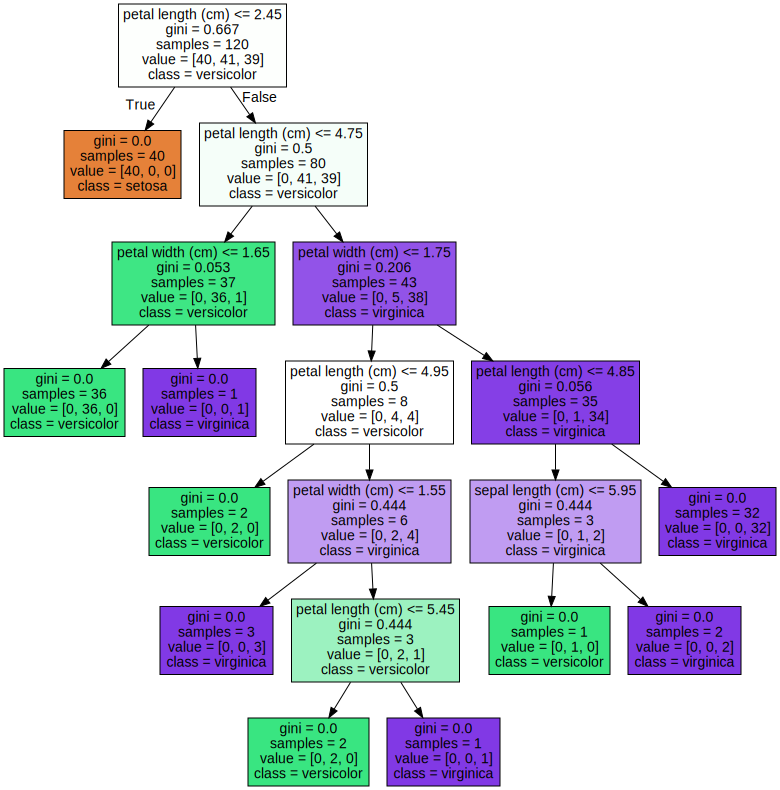

In [ ]:
dot_data = tree.export_graphviz(Model, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## **Observations**




*  The Decision Tree Model met a **Validation Score of 94%** in average
*  The Prediction model gave a **Prediction result of 100% Accuracy Score**


*   **The Confusion Matrix report** : the False negative and False positive are zeros, showing, the predictions are accurate with no False reading; therefore the **Performance of the Model is High and Accurate**



*   Classification_report and Accuracy Score shows **100% Accuracy of the Prediction Model**






## **Result**: 


*   Thus,  the purpose is met here Succesfully; 
*   If we feed any new data to this classifier, it would be able to predict the right class accordingly.

*   Also the Prediction Model of CLassifier, Works Perfectly with 100% Accuracy
*   This was possible because the dataset we recieved is 

